# Camera Calibration

In [8]:
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks_cwt
%matplotlib inline

In [9]:
# prepare object points
nx = 9 # The number of inside corners in x
ny = 6 # The number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


camera_cal/calibration10.jpg
camera_cal/calibration11.jpg
camera_cal/calibration12.jpg
camera_cal/calibration13.jpg
camera_cal/calibration14.jpg
camera_cal/calibration15.jpg
camera_cal/calibration16.jpg
camera_cal/calibration17.jpg
camera_cal/calibration18.jpg
camera_cal/calibration19.jpg
camera_cal/calibration2.jpg
camera_cal/calibration20.jpg
camera_cal/calibration3.jpg
camera_cal/calibration6.jpg
camera_cal/calibration7.jpg
camera_cal/calibration8.jpg
camera_cal/calibration9.jpg


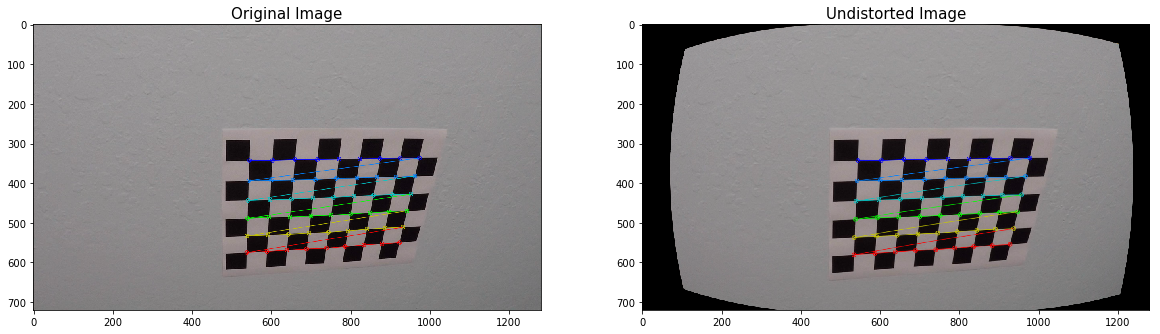

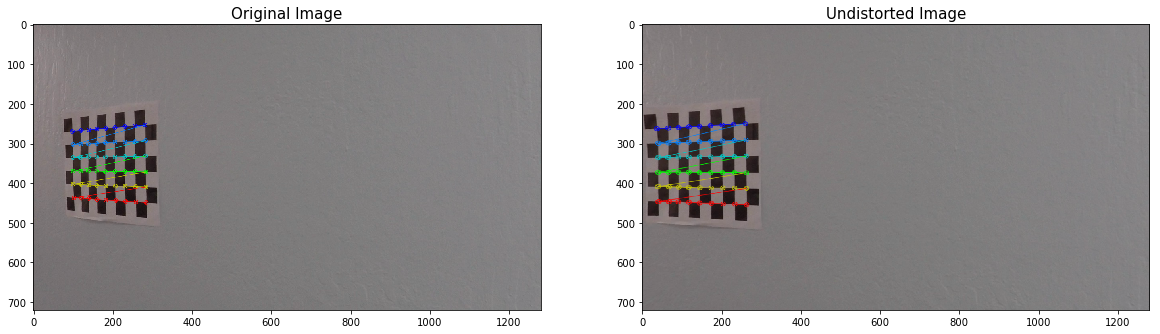

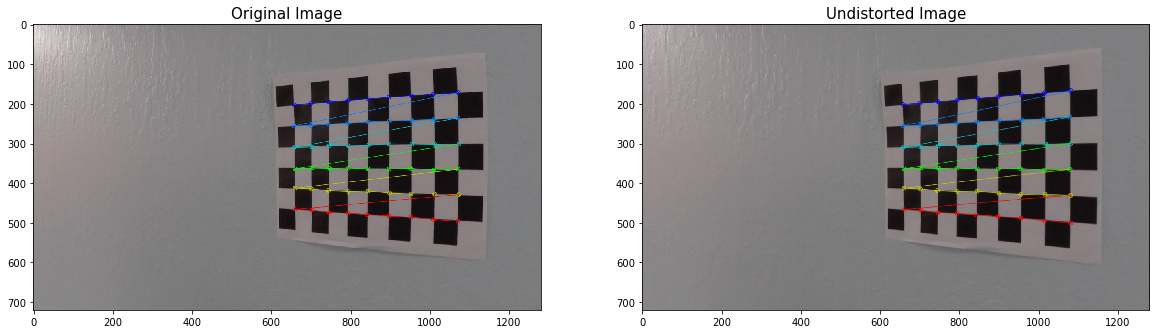

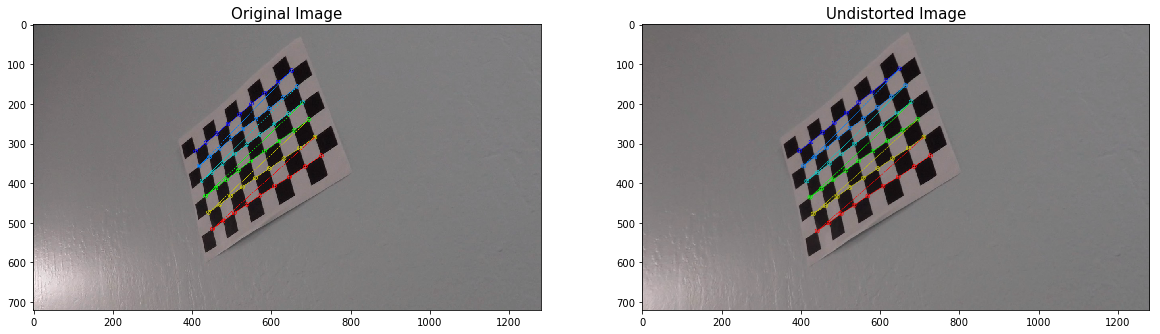

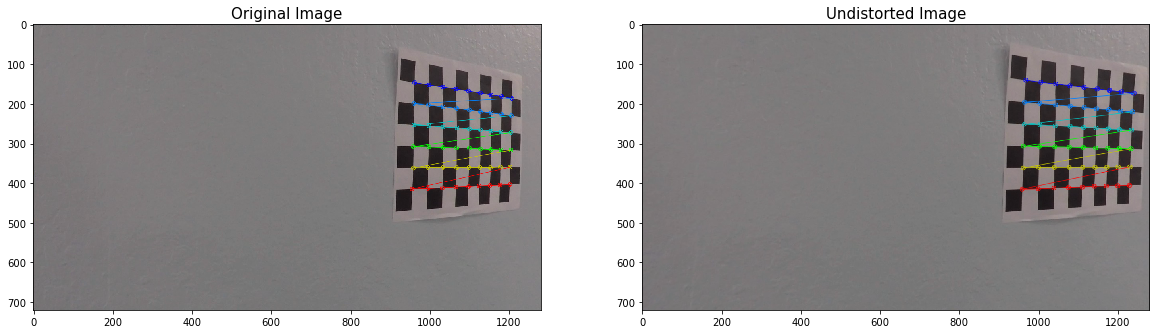

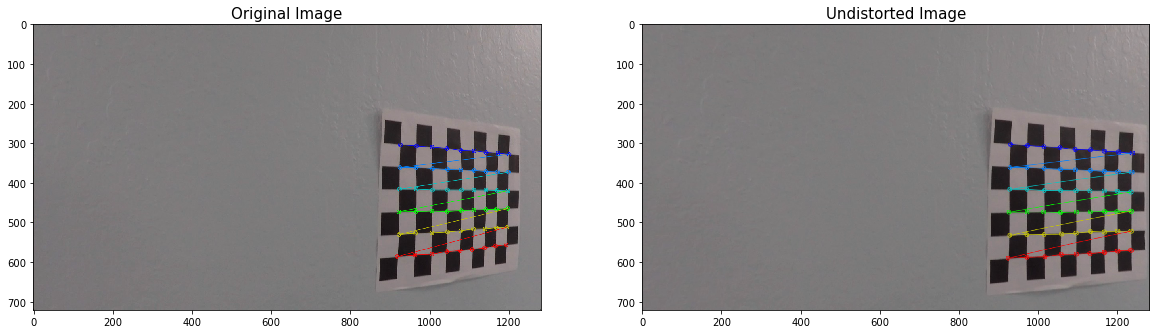

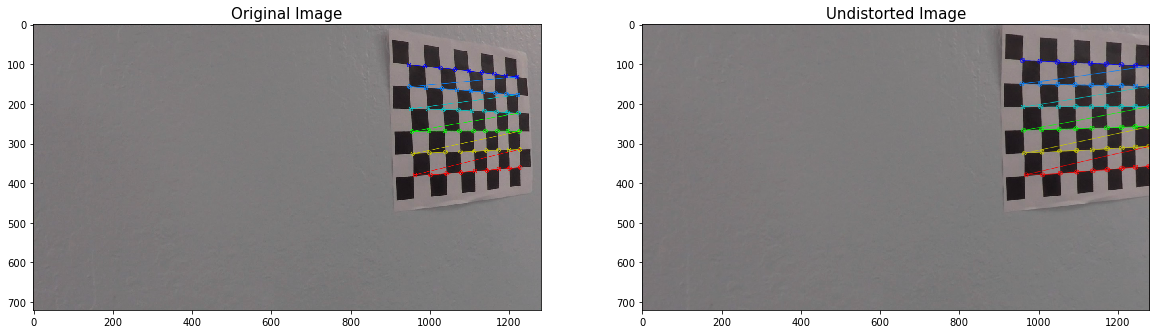

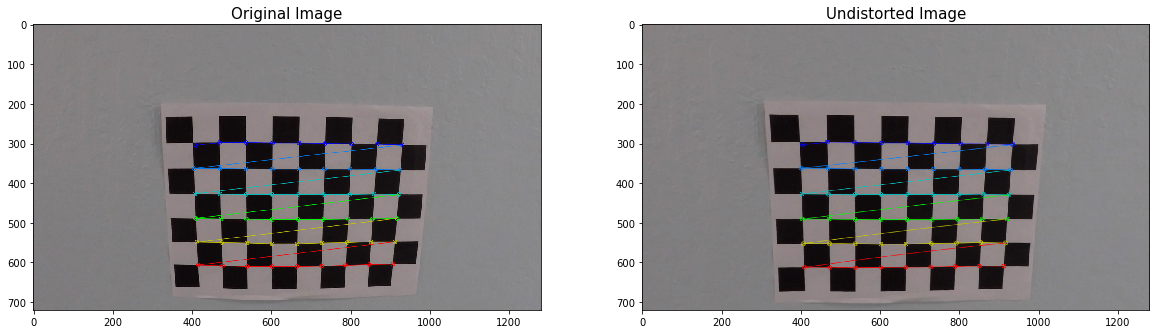

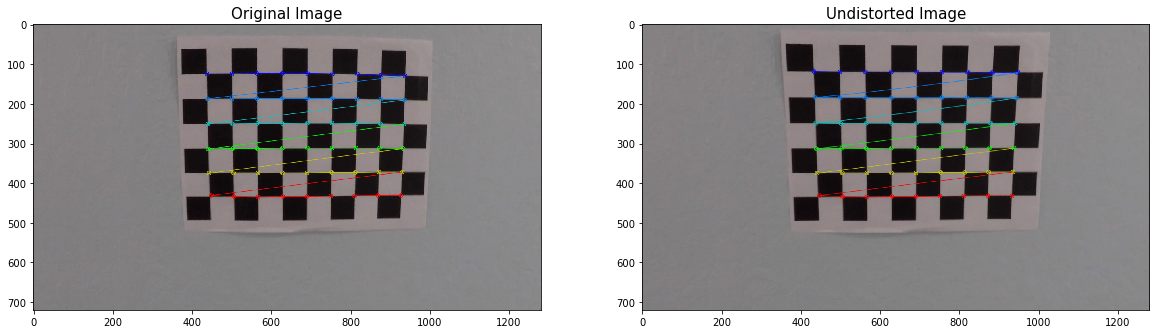

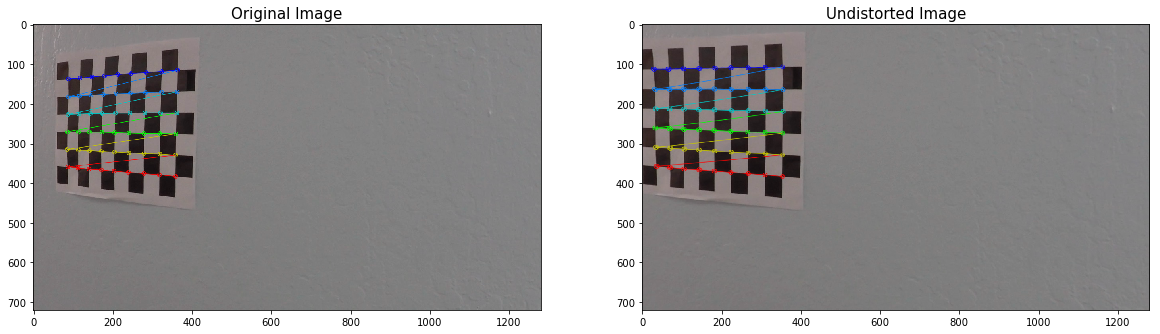

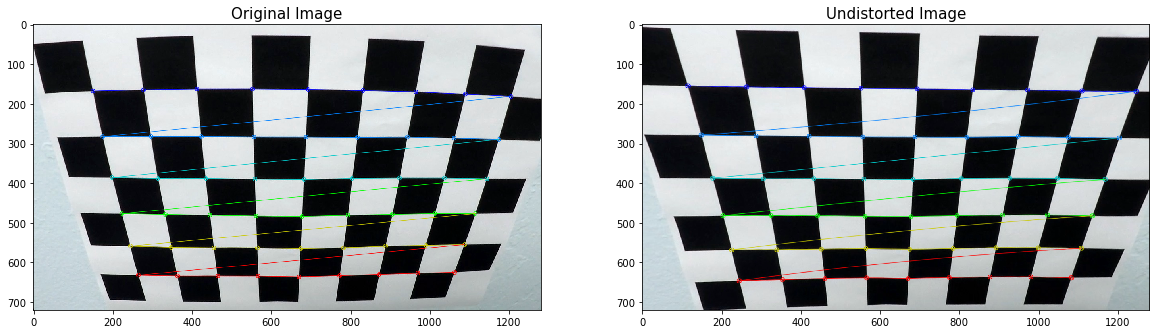

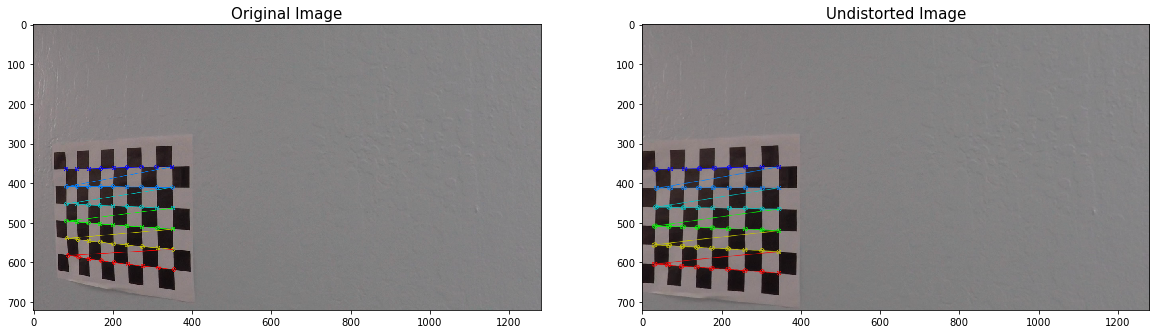

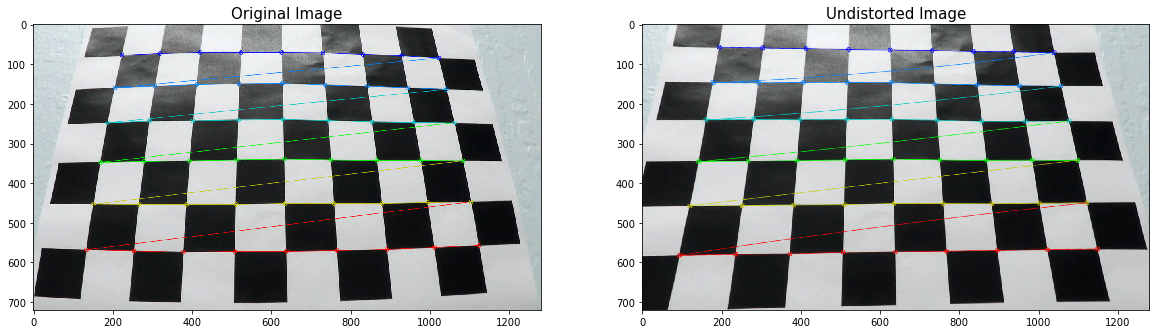

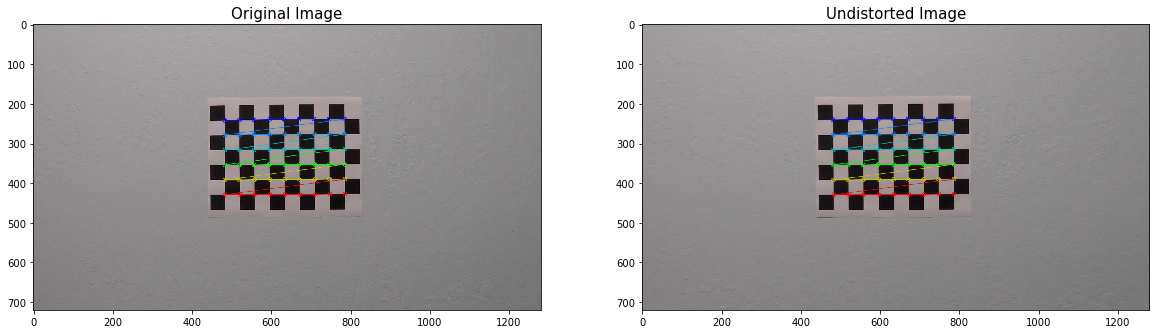

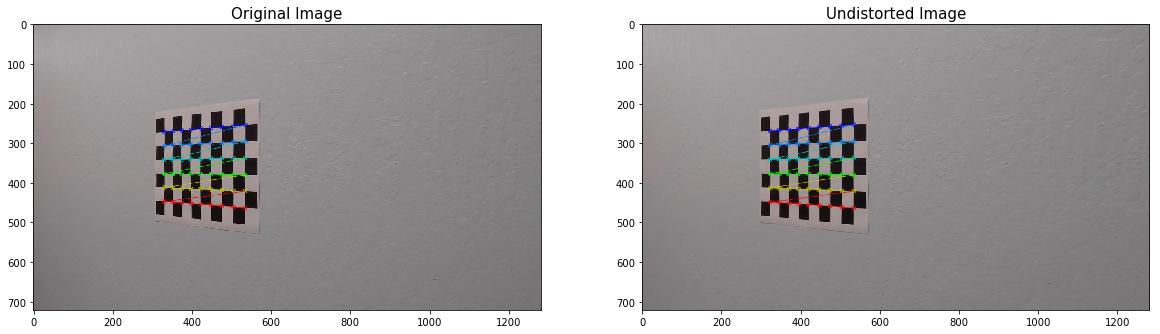

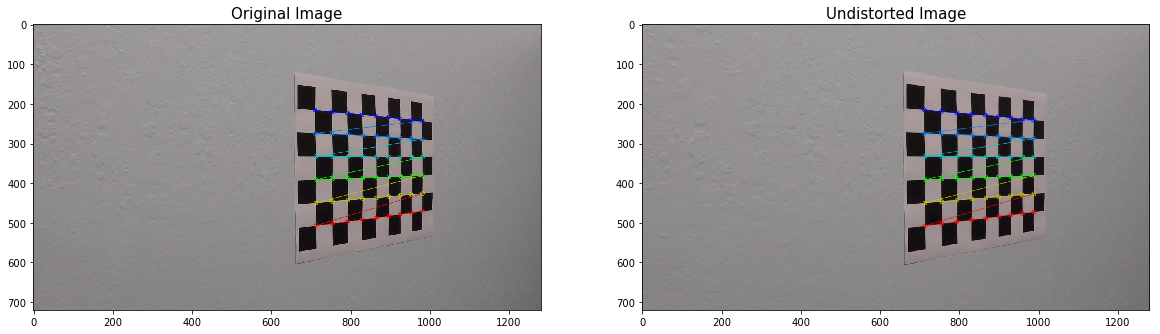

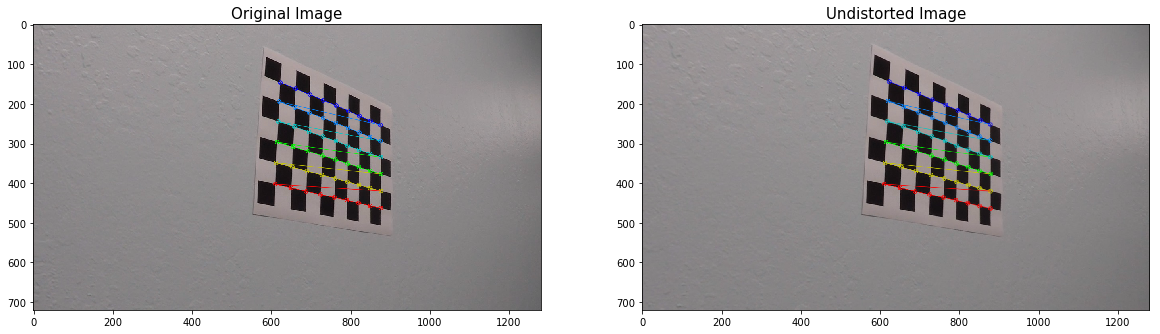

In [10]:
paths = glob.glob('camera_cal/calibration*.jpg')

for path in paths:
    fname = path;
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    #convert the image to grey scale 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #calculate the corners 
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
    # If found, add object points, image points
    if ret == True:
        print(fname)
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        # Do camera calibration given object points and image points
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        cv2.imwrite('calibration_wide/test_undist.jpg',dst)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=15)
        ax2.imshow(dst)
        ax2.set_title('Undistorted Image', fontsize=15)

In [11]:
def corners_unwarp(img, nx, ny, mtx, dist):
    img = cv2.resize(img, (720, 405))
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)
    apex, apey = 360, 258
    offset_far = 50
    offset_near = 10
    src = np.float32([[int(apex-offset_far),apey],
                      [int(apex+offset_far),apey],
                      [int(0+offset_near),390],
                      [int(720-offset_near),390]])
    dst = np.float32([[0,0],[720,0],[0,405],[720,405]])
    perspective_M = cv2.getPerspectiveTransform(src, dst)
    top_down = cv2.warpPerspective(img,  perspective_M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
    return top_down,perspective_M

In [12]:
paths = glob.glob('test_images/test*.jpg')

for path in paths:
    img = plt.imread(path)
    unwarped,M = corners_unwarp(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(unwarped, cv2.COLOR_BGR2GRAY)

NameError: name 'image' is not defined